In [1]:
import os

#counting the number of files in train folder
path, dirs, files = next(os.walk('/home/mitraa/Jupyter Notebook/Dataset1/train'))
file_count = len(files)
print('Number of images:', file_count)

Number of images: 25000


printing the name of images

In [2]:
file_names = os.listdir('/home/mitraa/Jupyter Notebook/Dataset1/train')
print(file_names)

['dog.10714.jpg', 'dog.8585.jpg', 'cat.2527.jpg', 'cat.10093.jpg', 'dog.4454.jpg', 'cat.10685.jpg', 'cat.10793.jpg', 'dog.5767.jpg', 'dog.3154.jpg', 'cat.6060.jpg', 'cat.879.jpg', 'dog.2622.jpg', 'cat.4220.jpg', 'cat.768.jpg', 'cat.7777.jpg', 'dog.4592.jpg', 'cat.4485.jpg', 'cat.7382.jpg', 'cat.8095.jpg', 'dog.802.jpg', 'dog.8411.jpg', 'cat.725.jpg', 'dog.1275.jpg', 'dog.4776.jpg', 'cat.7198.jpg', 'cat.4785.jpg', 'cat.4675.jpg', 'cat.5904.jpg', 'cat.1590.jpg', 'dog.5759.jpg', 'cat.4828.jpg', 'dog.639.jpg', 'dog.6728.jpg', 'cat.4435.jpg', 'dog.2340.jpg', 'cat.9700.jpg', 'dog.12482.jpg', 'cat.8496.jpg', 'cat.1825.jpg', 'dog.2597.jpg', 'cat.7629.jpg', 'dog.11863.jpg', 'dog.5248.jpg', 'dog.9432.jpg', 'cat.7942.jpg', 'cat.7553.jpg', 'cat.462.jpg', 'dog.3311.jpg', 'dog.5605.jpg', 'dog.10278.jpg', 'cat.2640.jpg', 'cat.9511.jpg', 'cat.4419.jpg', 'dog.5431.jpg', 'cat.12193.jpg', 'cat.11519.jpg', 'cat.3018.jpg', 'dog.10940.jpg', 'dog.7476.jpg', 'cat.269.jpg', 'dog.3425.jpg', 'dog.6791.jpg', 'cat

Importing the dependencies

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

In [11]:
def cv2_imshow(image):
    image = cv2.imread('/home/mitraa/Jupyter Notebook/Dataset1/train')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## Displaying the images of dogs and cats

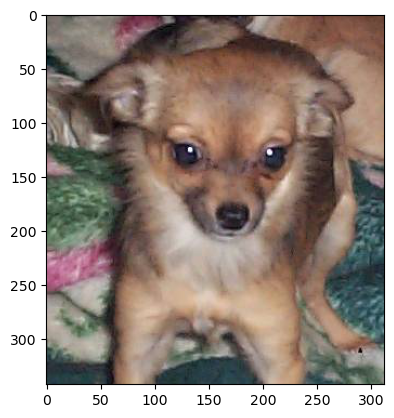

In [37]:
# display dog image
img = mpimg.imread('/home/mitraa/Jupyter Notebook/Dataset1/train/dog.11729.jpg')
imgplot = plt.imshow(img)
plt.show()

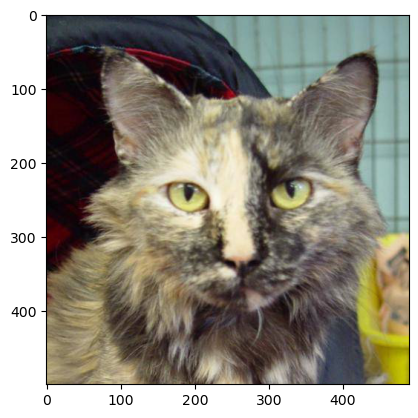

In [38]:
# display cat image
img = mpimg.imread('/home/mitraa/Jupyter Notebook/Dataset1/train/cat.10.jpg')
imgplot = plt.imshow(img)
plt.show()

In [26]:
file_names = os.listdir('/home/mitraa/Jupyter Notebook/Dataset1/train')

for i in range(5):
    name = file_names[i]
    print(name[0:3])

dog
dog
cat
cat
dog


In [27]:
file_names = os.listdir('/home/mitraa/Jupyter Notebook/Dataset1/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
    name = img_file[0:3]
    if name == 'dog':
        dog_count += 1
    else:
        cat_count += 1

print('number of dog images:', dog_count)
print('number of cat images:', cat_count)

number of dog images: 12500
number of cat images: 12500


## Resizing all the imges

In [28]:
# creating a directory for resized images
os.mkdir('/home/mitraa/Jupyter Notebook/Dataset1/image resized')

In [31]:
original_folder = '/home/mitraa/Jupyter Notebook/Dataset1/train/'
resized_folder = '/home/mitraa/Jupyter Notebook/Dataset1/image resized/'

for i in range(2000):
    
    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename
    
    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')
    
    newImgPath = resized_folder+filename
    img.save(newImgPath)

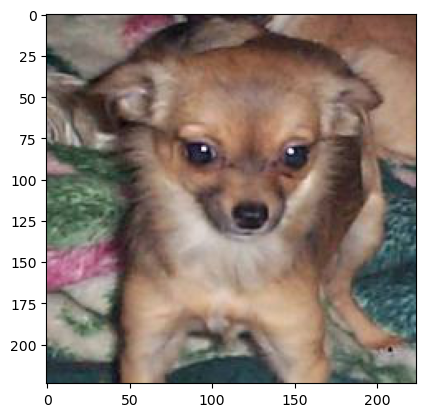

In [34]:
 # display dog image
img = mpimg.imread('/home/mitraa/Jupyter Notebook/Dataset1/image resized/dog.11729.jpg')
imgplot = plt.imshow(img)
plt.show()

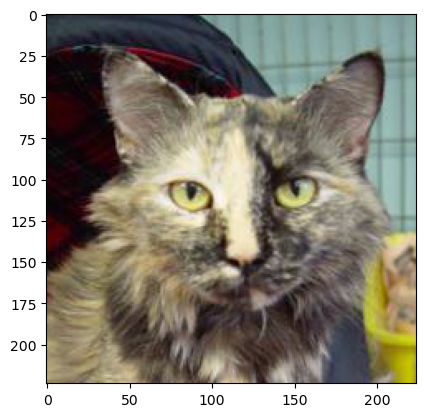

In [36]:
# display cat image
img = mpimg.imread('/home/mitraa/Jupyter Notebook/Dataset1/image resized/cat.10.jpg')
imgplot = plt.imshow(img)
plt.show()

## Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [39]:
# creating a for loop to assign labels
filenames = os.listdir('/home/mitraa/Jupyter Notebook/Dataset1/image resized')

labels = []
    
for i in range(2000):
    file_name = filenames[i]
    label = file_name[0:3]
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [42]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 0, 1]
2000


In [43]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1003  997]


## Converting all the resized images to numpy arrays

In [44]:
import glob

In [54]:
image_directory = '/home/mitraa/Jupyter Notebook/Dataset1/image resized/'
image_extension = ['png', 'jpg']

files = []

for e in image_extension:
    files.extend(glob.glob(image_directory + '*.' + e))

if len(files) == 0:
    print("No files found with the given image directory and extension.")
else:
    dog_cat_images = []

    for file in files:
        image = cv2.imread(file)
        if image is not None:
            dog_cat_images.append(image)

    dog_cat_images = np.asarray(dog_cat_images)

    print("dog_cat_images:")
    print(dog_cat_images)

dog_cat_images:
[[[[ 20  37  10]
   [ 18  35   8]
   [ 19  36   9]
   ...
   [ 10  21   1]
   [  2  13   0]
   [  7  18   0]]

  [[ 22  38  14]
   [ 18  35   8]
   [ 18  34  10]
   ...
   [ 13  24   4]
   [  9  20   0]
   [ 15  26   6]]

  [[ 29  42  20]
   [ 21  35  11]
   [ 18  31   9]
   ...
   [ 18  29   9]
   [ 19  31  11]
   [ 27  39  19]]

  ...

  [[ 49  31 160]
   [ 43  25 154]
   [ 43  24 151]
   ...
   [183 188 191]
   [173 178 179]
   [160 166 165]]

  [[ 47  29 158]
   [ 42  24 153]
   [ 41  22 149]
   ...
   [170 171 181]
   [176 178 186]
   [180 183 188]]

  [[ 53  35 164]
   [ 48  30 159]
   [ 48  29 156]
   ...
   [174 174 186]
   [176 176 188]
   [173 174 184]]]


 [[[ 42  45  59]
   [ 42  45  59]
   [ 42  45  59]
   ...
   [ 33  42  56]
   [ 33  42  56]
   [ 33  42  56]]

  [[ 42  45  59]
   [ 42  45  59]
   [ 42  45  59]
   ...
   [ 34  43  57]
   [ 34  43  57]
   [ 35  44  58]]

  [[ 41  46  61]
   [ 41  46  61]
   [ 41  46  61]
   ...
   [ 37  46  60]
   [ 37  46 